<center><h2> Behavioral Risk Factor Data</h2></center>  
<center><h3> A Research on E-cigarette Users of District of Columbia  in 2017  </h3></center><br></br>
<center><h4>Authors:</h4></center>

<center><h4>Yashar Mansouri & Nasrin Khansari</h4></center>

# Φ. Introduction

## Data Description & Resources

**Data Last Updated**: December 11, 2018

**Metadata Last Updated**: February 14, 2019

**Date Created**: June 3, 2014

**Data Provided by**: Centers for Disease Control and Prevention, National Center for Chronic Disease Prevention and Health Promotion, Office on Smoking and Health

**Publisher**: Centers for Disease Control and Prevention

**Contact Name**: OSHData Support

**Contact Email**: OSHData@cdc.gov

**Bureau Code**: 009:20

**Program Code**: 009:020

**Public Access Level**: Public Domain

**Data Dictionary**: https://chronicdata.cdc.gov/Survey-Data/Behavioral-Risk-Factor-Data-Tobacco-Use-2011-to-pr/wsas-xwh5

**References**: https://chronicdata.cdc.gov/d/5amh-5sx3

**Glossary/Methodology**: https://chronicdata.cdc.gov/d/5amh-5sx3

**Category**: Survey Data

**Tags**: osh, office on smoking and health, state system, tobacco, survey, behavioral, risk, surveillance, tobacco use, cigarette, cigarette use, adult, smoking, smoking status, smoker, current, former, never, ever, frequency, every day, some days, demographics, age, gender, race, ethnicity, education, cessation, quit, prevalence, brfss

**License**: Public Domain

**Source Link**: http://www.cdc.gov/brfss/



## A Quick Breif on Data

### Source
Behavioral Risk Factor Surveillance System Survey Data

### Methods
The BRFSS is a continuous, state-based surveillance system that collects information about modifiable risk factors for chronic diseases and other leading causes of death. The data for the STATE System were extracted from the annual BRFSS surveys from participating states. For estimates among racial and ethnic subgroups, two-year combined data are available. Sample sizes of less than 50 were considered to be inadequate for data analysis. The STATE System does not display percentages for these sample sizes; instead, "NA" will appear in the percentage box for that demographic group.

### Sampling

For 2011 data and forward, a random-digit dialing system was used to select samples of adults in households with landline or cellular telephones. The sample represented adults from each state who were civilian, aged 18 years or older and not institutionalized. Most states now use a computer-assisted telephone interviewing software program (CATI). This allows the interviewer to enter the data directly into a computer, thus reducing errors and eliminating unacceptable responses. More detailed information on the sampling methodology is located on the BRFSS website (http://www.cdc.gov/brfss/)."

### Questionnaire

The questionnaire was composed of three sets of questions: 

1. A core set of questions asked in all participating states. 
2. A standard module containing questions on selected topics developed by CDC and asked at the discretion of each state. 
3. Questions developed for a particular state to meet a particular need.

The core questions allow data to be compared between states. Because many of the same questions are asked each year, emerging health trends can be identified and monitored.

**Notes**: "NA" indicates that survey data are not available. 

**Citation**: Centers for Disease Control and Prevention (CDC). Behavioral Risk Factor Surveillance System Survey Data. Atlanta, Georgia: U.S. Department of Health and Human Services, Centers for Disease Control and Prevention, 2019. 


## Research Purpose & Abstract

### Purpose: 

Purpose of this research is to provide meaningful analysis on the current usage trends of the e-cigarettes which has been a hot topic in the recent years. In exploratory data analysis, research tries to visualize the usage trend of the current smokers in the United States based on their age, gender, and education difference and further looks whether these differences are significant or not. 

### Abstract:



# I. Exploratory Data Analysis (EDA)

## Importing Libraries

In [49]:
# importing libraries

# !pip install pandas-profiling # run this pandas profiling is not installed
# !pip install sodapy # run this line if sodapy is not installed

from sodapy import Socrata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", palette="pastel")
import pandas_profiling
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
%matplotlib inline

## Importing Data via Socrata API

Documentation can be found here: https://dev.socrata.com/foundry/chronicdata.cdc.gov/wsas-xwh5

- Since the data is less than the limit of the API, there' sno need for user and password tokens.
- There is a total of 33451 rows in the dataset. limit is on 35000 to capture all values. 

In [2]:
# importing data

client = Socrata("chronicdata.cdc.gov", None)

# total rows of data is 33451, setting limit to 35000 to capture all data

results = client.get("wsas-xwh5", limit=35000)

# Convert to pandas DataFrame

df = pd.DataFrame.from_records(results)

## Data Cleaning

### Dropping columns

1. **'topictype'** is Tobacco Use - Survey Data on all entries
2. **'topictypeid** is BEH on all entries
2. **'topicid', 'measureid', 'stratificationid1', 'stratificationid2', 'stratificationid3','stratificationid4', 'submeasureid', 'displayorder'** are not needed since theyre used on CDC's application.
3. **':@computed_region_bxsw_vy29', ':@computed_region_he4y_prf8'** created while importing via API and unnecessary
4. **'data_value_footnote', 'data_value_footnote_symbol'** unnecessary since null data_values are dropped based on these twp column
5. **'datasource'** is BRFSS on all entries
6. **'data_value_type'** is Percentage on all entries
7. **'data_value_unit'** is % on all entries


### Dropping NA values

- null values are dropped based on subsetting by **data_value** and  **sample_size**

- null response values are kept due to including more than two-thirds of the data.

### Duplicate Values

- Data doesn't show any duplicate values after dropping the nulls subsetted on the **data_value** and **sample_size**

### Dropping Rows

- consecutive 2 year values from rows are taken out."2011-2012", "2012-2013", "2013-2014", "2014-2015", "2015-2016", "2016-2017"

### Setting Type Values

- 'year' value was set to **int**

- 'sample_size', 'data_value', 'data_value_std_err', 'low_confidence_limit', 'high_confidence_limit' were set to **float**

### New Columns

- a **['count']** column was created by multiplying data_value * sample_size, used as the successful rate in samples. 

In [3]:
df.head()

,:@computed_region_bxsw_vy29,:@computed_region_he4y_prf8,age,data_value,data_value_footnote,data_value_footnote_symbol,data_value_std_err,data_value_type,data_value_unit,datasource,...,stratificationid1,stratificationid2,stratificationid3,stratificationid4,submeasureid,topicdesc,topicid,topictype,topictypeid,year
0,29,94,45 to 64 Years,6.5,NaN,NaN,0.6,Percentage,%,BRFSS,...,1GEN,3AGE,6RAC,6EDU,BRF67,Smokeless Tobacco Use (Adults),150BEH,Tobacco Use – Survey Data,BEH,2017
1,29,94,All Ages,52.8,NaN,NaN,1.3,Percentage,%,BRFSS,...,1GEN,8AGE,6RAC,6EDU,BRF05,Cessation (Adults),101BEH,Tobacco Use – Survey Data,BEH,2017
2,29,94,All Ages,37.7,NaN,NaN,3.8,Percentage,%,BRFSS,...,2GEN,8AGE,6RAC,6EDU,BRF79,Smokeless Tobacco Use (Adults),150BEH,Tobacco Use – Survey Data,BEH,2017
3,29,94,All Ages,40.2,NaN,NaN,7.8,Percentage,%,BRFSS,...,1GEN,8AGE,2RAC,6EDU,BRF22,Cigarette Use (Adults),100BEH,Tobacco Use – Survey Data,BEH,2017
4,29,94,18 to 44 Years,21.9,NaN,NaN,1.7,Percentage,%,BRFSS,...,3GEN,5AGE,6RAC,6EDU,BRF45,Cigarette Use (Adults),100BEH,Tobacco Use – Survey Data,BEH,2017


In [4]:
# dropping the unnecessary columns by keeping/reordering the required ones for better analysis purposes:
df = df[['year', 'locationabbr', 'locationdesc', 'topicdesc', 'measuredesc', 'age', 'gender', 'race', 'education',
         'response', 'sample_size', 'data_value', 'data_value_std_err', 'low_confidence_limit', 'high_confidence_limit']]

In [5]:
# dropping null values based on the data_value and sample_size
df.dropna(subset=['data_value', 'sample_size'], inplace=True)

In [6]:
# checking for duplicates
df.duplicated().sum() > 0

False

In [7]:
df.isna().sum()
# we'll keep the null response values

year                         0
locationabbr                 0
locationdesc                 0
topicdesc                    0
measuredesc                  0
age                          0
gender                       0
race                         0
education                    0
response                 20852
sample_size                  0
data_value                   0
data_value_std_err           0
low_confidence_limit         0
high_confidence_limit        0
dtype: int64

In [8]:
# dropping 2 consecutive years/ cumulative data
year_idx_drop = df.query(
    '(year == "2011-2012") | (year == "2012-2013") | (year == "2013-2014") | (year == "2014-2015") | (year == "2015-2016") | (year == "2016-2017")').index

df.drop(year_idx_drop, inplace=True)

In [9]:
#changing the the data type in the specified columns
df[['sample_size', 'data_value', 'data_value_std_err',
    'low_confidence_limit', 'high_confidence_limit']] = df[['sample_size', 'data_value', 'data_value_std_err',
                                                            'low_confidence_limit', 'high_confidence_limit']].astype(float)
df[['year']] = df[['year']].astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28598 entries, 0 to 33450
Data columns (total 15 columns):
year                     28598 non-null int32
locationabbr             28598 non-null object
locationdesc             28598 non-null object
topicdesc                28598 non-null object
measuredesc              28598 non-null object
age                      28598 non-null object
gender                   28598 non-null object
race                     28598 non-null object
education                28598 non-null object
response                 10995 non-null object
sample_size              28598 non-null float64
data_value               28598 non-null float64
data_value_std_err       28598 non-null float64
low_confidence_limit     28598 non-null float64
high_confidence_limit    28598 non-null float64
dtypes: float64(5), int32(1), object(9)
memory usage: 3.4+ MB


In [11]:
#creating a column of count in case further analysis requires the averaae number of people 
df['count'] = df.data_value * (df.sample_size / 100)

In [12]:
df.head()

,year,locationabbr,locationdesc,topicdesc,measuredesc,age,gender,race,education,response,sample_size,data_value,data_value_std_err,low_confidence_limit,high_confidence_limit,count
0,2017,AL,Alabama,Smokeless Tobacco Use (Adults),Current Use,45 to 64 Years,Overall,All Races,All Grades,NaN,2413.0,6.5,0.6,5.2,7.8,156.845
1,2017,AL,Alabama,Cessation (Adults),Percent of Former Smokers Among Ever Smokers,All Ages,Overall,All Races,All Grades,NaN,2834.0,52.8,1.3,50.3,55.3,1496.352
2,2017,AL,Alabama,Smokeless Tobacco Use (Adults),Frequency of Use,All Ages,Male,All Races,All Grades,Some Days,272.0,37.7,3.8,30.3,45.1,102.544
3,2017,AL,Alabama,Cigarette Use (Adults),Current Smoking,All Ages,Overall,American Indian/Alaska Native,All Grades,NaN,78.0,40.2,7.8,25.0,55.4,31.356
4,2017,AL,Alabama,Cigarette Use (Adults),Current Smoking,18 to 44 Years,Female,All Races,All Grades,NaN,962.0,21.9,1.7,18.5,25.3,210.678


### EDA Visualizations

- Preliminary data analysis is done via pandas_profiling

In [48]:
pandas_profiling.ProfileReport(df)

### EDA Visualization 1: 
Analysis of the genders and the data_value per each year from 2011 to 2017



In [13]:
# creating subset query for the users in 201-2017, overall gender, all races combined, all education levels, all ages
years11_17_users = df.query('(measuredesc == "Current Use") | (measuredesc == "Current Smoking") & (race == "All Races") & ( gender == "Overall") &  (education == "All Grades") & (age == "All Ages") ')
years11_17_users.head()

,year,locationabbr,locationdesc,topicdesc,measuredesc,age,gender,race,education,response,sample_size,data_value,data_value_std_err,low_confidence_limit,high_confidence_limit,count
0,2017,AL,Alabama,Smokeless Tobacco Use (Adults),Current Use,45 to 64 Years,Overall,All Races,All Grades,NaN,2413.0,6.5,0.6,5.2,7.8,156.845
8,2017,AL,Alabama,Smokeless Tobacco Use (Adults),Current Use,All Ages,Male,All Races,All Grades,NaN,2600.0,11.5,0.8,9.8,13.2,299.000
15,2017,AL,Alabama,E-Cigarette Use (Adults),Current Use,Age 25 and Older,Overall,All Races,> 12th Grade,NaN,3560.0,3.8,0.5,2.9,4.7,135.280
18,2017,AL,Alabama,E-Cigarette Use (Adults),Current Use,18 to 44 Years,Female,All Races,All Grades,NaN,956.0,5.0,0.9,3.2,6.8,47.800
24,2017,AL,Alabama,E-Cigarette Use (Adults),Current Use,All Ages,Overall,All Races,All Grades,NaN,6441.0,4.9,0.4,4.1,5.7,315.609


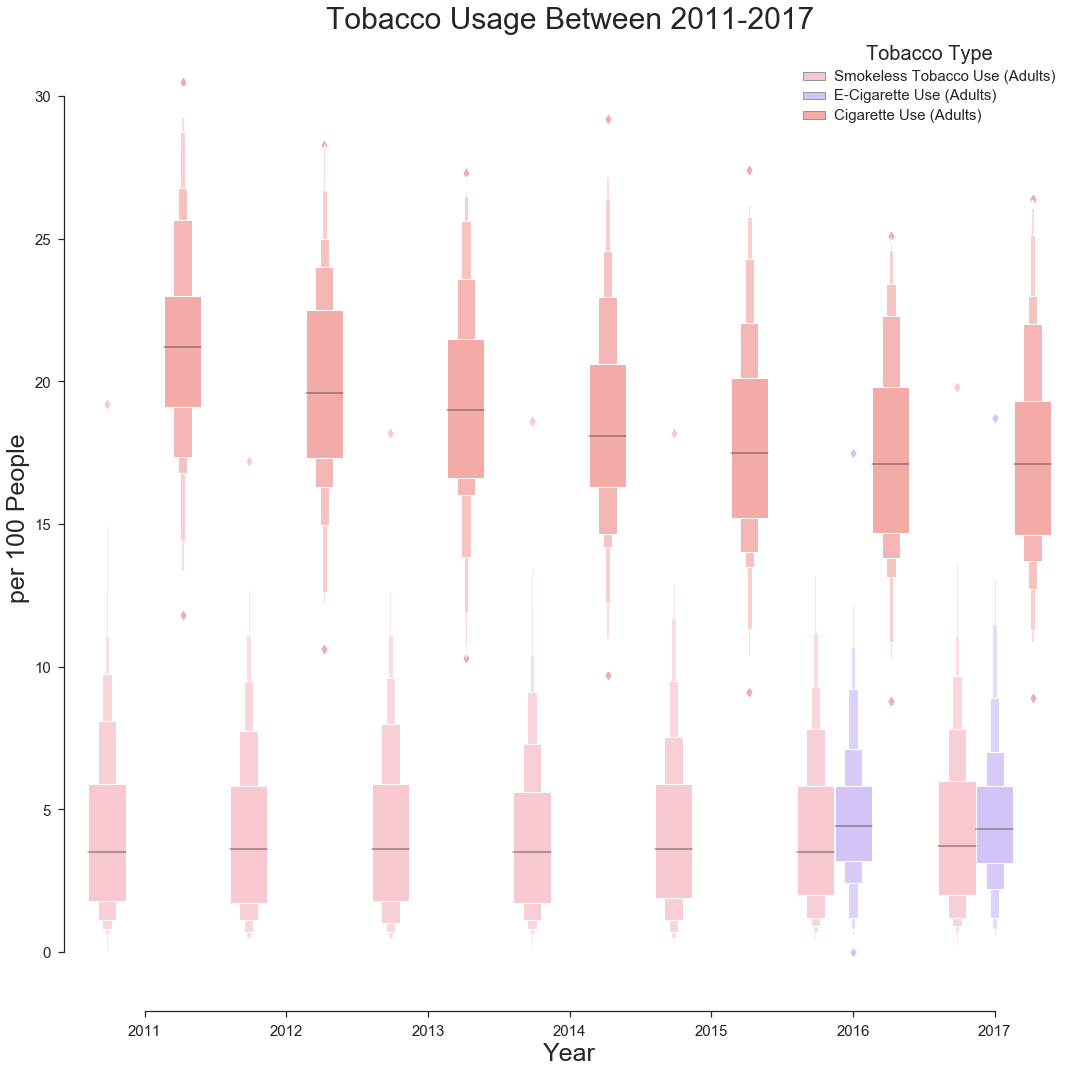

In [56]:
plt.figure(figsize=(15, 15))

fig1 = sns.boxenplot(x="year", y="data_value",
                   hue="topicdesc", palette=["pink", "m", "r"],
                   data=years11_17_users)

sns.despine(offset=10, trim=True)
fig1.set_title("Tobacco Usage Between 2011-2017", fontsize=30)
fig1.set_xlabel("Year", fontsize=25)
fig1.set_ylabel("per 100 People", fontsize=25)
fig1.tick_params(labelsize=15)
plt.legend(title = 'Tobacco Type')
plt.setp(fig1.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(fig1.get_legend().get_title(), fontsize='20') # for legend title
plt.tight_layout()
plt.show()

Based on the analysis:
1. Cigarette Users have the highest proportion of the U.S. population, however a decreasing pattern is visible between 2011-2017.

2. Smokeless tobacco users have the lowest proportion of the society. Smokeless tobacco use means using chewing tobacco or snuff on 1 or more of the 30 days before participation in a survey about this topic.

3. According to the dataset e-cigarette reports are have only started from 2016. There are reports saying the e-cigs have been in use from the 80s, yet the modernization began from 2000s.

BRFSS questionnaires started including the e-cigs topic from 2016. Before this, notes were to exclude the e-cigs or vaping from the smoking categories.

[BRFSS 2015 Questionnaire](https://www.cdc.gov/brfss/questionnaires/pdf-ques/2015-brfss-questionnaire-12-29-14.pdf)

### EDA Visualization 2

Looking for the disparity between the gender of e-cig users in 2017 in U.S.

In [15]:
#limiting the topic on the e-cig usage 2017
year_gender_subset = df.query('(year == 2017) & (race == "All Races") & ( gender != "Overall") & (topicdesc == "E-Cigarette Use (Adults)") & (measuredesc == "Current Use") & (education == "All Grades") & (age == "All Ages")')
year_gender_subset


,year,locationabbr,locationdesc,topicdesc,measuredesc,age,gender,race,education,response,sample_size,data_value,data_value_std_err,low_confidence_limit,high_confidence_limit,count
55,2017,AL,Alabama,E-Cigarette Use (Adults),Current Use,All Ages,Female,All Races,All Grades,NaN,3855.0,3.9,0.5,3.0,4.8,150.345
102,2017,AL,Alabama,E-Cigarette Use (Adults),Current Use,All Ages,Male,All Races,All Grades,NaN,2582.0,6.1,0.7,4.7,7.5,157.502
635,2017,AK,Alaska,E-Cigarette Use (Adults),Current Use,All Ages,Male,All Races,All Grades,NaN,1486.0,3.8,1.0,1.8,5.8,56.468
724,2017,AK,Alaska,E-Cigarette Use (Adults),Current Use,All Ages,Female,All Races,All Grades,NaN,1591.0,3.1,0.8,1.6,4.6,49.321
1279,2017,AZ,Arizona,E-Cigarette Use (Adults),Current Use,All Ages,Female,All Races,All Grades,NaN,8050.0,3.8,0.3,3.2,4.4,305.900
1293,2017,AZ,Arizona,E-Cigarette Use (Adults),Current Use,All Ages,Male,All Races,All Grades,NaN,6584.0,6.7,0.4,5.8,7.6,441.128
1939,2017,AR,Arkansas,E-Cigarette Use (Adults),Current Use,All Ages,Male,All Races,All Grades,NaN,1802.0,8.7,1.4,6.1,11.3,156.774
1993,2017,AR,Arkansas,E-Cigarette Use (Adults),Current Use,All Ages,Female,All Races,All Grades,NaN,3251.0,2.8,0.5,1.8,3.8,91.028
2621,2017,CA,California,E-Cigarette Use (Adults),Current Use,All Ages,Male,All Races,All Grades,NaN,4236.0,4.3,0.4,3.5,5.1,182.148
2623,2017,CA,California,E-Cigarette Use (Adults),Current Use,All Ages,Female,All Races,All Grades,NaN,4411.0,1.8,0.2,1.3,2.3,79.398


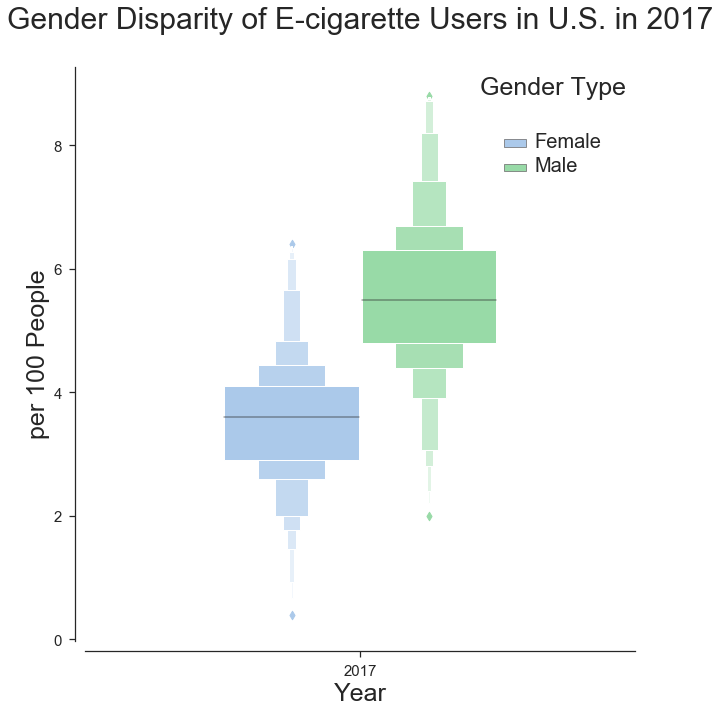

In [69]:
plt.figure(figsize=(10, 10))
fig2 = sns.boxenplot(x="year", y="data_value", width = 0.5,
            hue="gender", palette=["b", "g"],
            data=year_gender_subset)
sns.despine(offset=10)


fig2.set_title("Gender Disparity of E-cigarette Users in U.S. in 2017\n", fontsize=30)
fig2.set_xlabel("Year", fontsize=25)
fig2.set_ylabel("per 100 People", fontsize=25)
fig2.tick_params(labelsize=15)
plt.legend(title = 'Gender Type\n')
plt.setp(fig2.get_legend().get_texts(), fontsize='20')
plt.setp(fig2.get_legend().get_title(), fontsize='25')
plt.tight_layout()
plt.show()

Second visualization shows the median of the male e-cig users seems to be higher than in females in 2017 between all states.

In [72]:
# Median values betwen male users and female users
year_gender_subset.groupby('gender')['data_value'].median()

gender
Female    3.6
Male      5.5
Name: data_value, dtype: float64

### EDA Visualizations 3

Looking for the disparity of education in e-cig users in 2017 in U.S.

In [17]:
edu_subset = df.query('(year == 2017) & (race == "All Races") & ( gender == "Overall") & (topicdesc == "E-Cigarette Use (Adults)") & (measuredesc == "Current Use") & (education != "All Grades")')
edu_subset

,year,locationabbr,locationdesc,topicdesc,measuredesc,age,gender,race,education,response,sample_size,data_value,data_value_std_err,low_confidence_limit,high_confidence_limit,count
15,2017,AL,Alabama,E-Cigarette Use (Adults),Current Use,Age 25 and Older,Overall,All Races,> 12th Grade,NaN,3560.0,3.8,0.5,2.9,4.7,135.280
51,2017,AL,Alabama,E-Cigarette Use (Adults),Current Use,Age 20 and Older,Overall,All Races,12th Grade,NaN,1868.0,6.3,0.9,4.6,8.0,117.684
60,2017,AL,Alabama,E-Cigarette Use (Adults),Current Use,Age 20 and Older,Overall,All Races,> 12th Grade,NaN,3712.0,4.0,0.5,3.0,5.0,148.480
77,2017,AL,Alabama,E-Cigarette Use (Adults),Current Use,Age 25 and Older,Overall,All Races,< 12th Grade,NaN,746.0,5.1,1.1,2.9,7.3,38.046
79,2017,AL,Alabama,E-Cigarette Use (Adults),Current Use,Age 25 and Older,Overall,All Races,12th Grade,NaN,1799.0,5.2,0.8,3.7,6.7,93.548
86,2017,AL,Alabama,E-Cigarette Use (Adults),Current Use,Age 20 and Older,Overall,All Races,< 12th Grade,NaN,755.0,5.4,1.1,3.2,7.6,40.770
631,2017,AK,Alaska,E-Cigarette Use (Adults),Current Use,Age 25 and Older,Overall,All Races,> 12th Grade,NaN,1985.0,2.7,0.9,1.0,4.4,53.595
708,2017,AK,Alaska,E-Cigarette Use (Adults),Current Use,Age 25 and Older,Overall,All Races,12th Grade,NaN,748.0,2.9,1.1,0.8,5.0,21.692
718,2017,AK,Alaska,E-Cigarette Use (Adults),Current Use,Age 20 and Older,Overall,All Races,< 12th Grade,NaN,179.0,3.1,1.4,0.3,5.9,5.549
720,2017,AK,Alaska,E-Cigarette Use (Adults),Current Use,Age 20 and Older,Overall,All Races,12th Grade,NaN,810.0,3.4,1.0,1.5,5.3,27.540


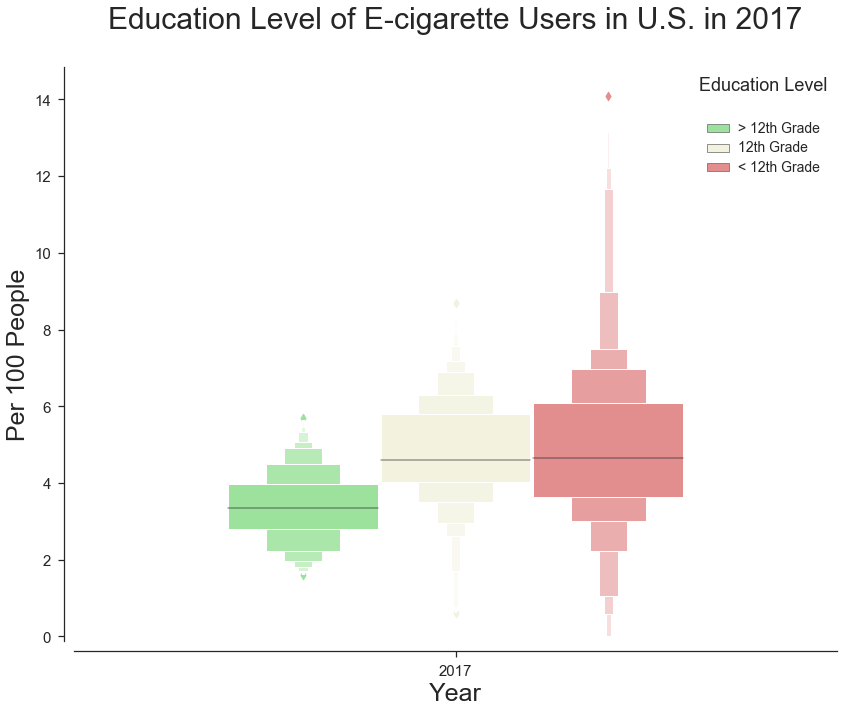

In [85]:
plt.figure(figsize=(12, 10))
fig3 = sns.boxenplot(x="year", y="data_value", width = 0.6,
                     hue="education", palette=["lightgreen", "beige", "lightcoral"],
                     data=edu_subset)
sns.despine(offset=10)
fig3.set_title(
    "Education Level of E-cigarette Users in U.S. in 2017\n", fontsize=30)
fig3.set_xlabel("Year", fontsize=25)
fig3.set_ylabel("Per 100 People", fontsize=25)
fig3.tick_params(labelsize=15)
plt.legend(title='Education Level\n')
plt.setp(fig3.get_legend().get_texts(), fontsize='14')  # for legend text
plt.setp(fig3.get_legend().get_title(), fontsize='18')  # for legend title
plt.tight_layout()
plt.show()

Comparing the groups of higher than 12 years of education and lower,  shows a median difference of approximately 1 person in 100 in 2017 U.S. population.

In [75]:
# Median values between higher than 12 yrs and less than 12 yrs of education
edu_subset.groupby('education')['data_value'].median()

education
12th Grade      4.60
< 12th Grade    4.65
> 12th Grade    3.35
Name: data_value, dtype: float64

### EDA Visualization 4

Visualizing the age disparity of the E-cig users in U.S. in 2017

In [19]:
age_subset = df.query('(year == 2017) & (race == "All Races") & ( gender == "Overall") & (topicdesc == "E-Cigarette Use (Adults)") & (measuredesc == "Current Use") & (education == "All Grades") & (age != "All Ages")')
age_subset

,year,locationabbr,locationdesc,topicdesc,measuredesc,age,gender,race,education,response,sample_size,data_value,data_value_std_err,low_confidence_limit,high_confidence_limit,count
57,2017,AL,Alabama,E-Cigarette Use (Adults),Current Use,25 to 44 Years,Overall,All Races,All Grades,NaN,1353.0,6.6,0.9,4.9,8.3,89.298
65,2017,AL,Alabama,E-Cigarette Use (Adults),Current Use,18 to 24 Years,Overall,All Races,All Grades,NaN,320.0,8.5,1.9,4.7,12.3,27.200
83,2017,AL,Alabama,E-Cigarette Use (Adults),Current Use,65 Years and Older,Overall,All Races,All Grades,NaN,2371.0,1.2,0.3,0.6,1.8,28.452
89,2017,AL,Alabama,E-Cigarette Use (Adults),Current Use,45 to 64 Years,Overall,All Races,All Grades,NaN,2397.0,4.4,0.6,3.3,5.5,105.468
646,2017,AK,Alaska,E-Cigarette Use (Adults),Current Use,18 to 24 Years,Overall,All Races,All Grades,NaN,161.0,7.5,2.2,3.2,11.8,12.075
663,2017,AK,Alaska,E-Cigarette Use (Adults),Current Use,65 Years and Older,Overall,All Races,All Grades,NaN,901.0,0.9,0.4,0.2,1.6,8.109
728,2017,AK,Alaska,E-Cigarette Use (Adults),Current Use,45 to 64 Years,Overall,All Races,All Grades,NaN,1292.0,1.8,0.5,0.8,2.8,23.256
729,2017,AK,Alaska,E-Cigarette Use (Adults),Current Use,25 to 44 Years,Overall,All Races,All Grades,NaN,726.0,4.5,1.4,1.7,7.3,32.670
1262,2017,AZ,Arizona,E-Cigarette Use (Adults),Current Use,25 to 44 Years,Overall,All Races,All Grades,NaN,2966.0,6.6,0.5,5.5,7.7,195.756
1289,2017,AZ,Arizona,E-Cigarette Use (Adults),Current Use,45 to 64 Years,Overall,All Races,All Grades,NaN,5083.0,4.0,0.3,3.4,4.6,203.320


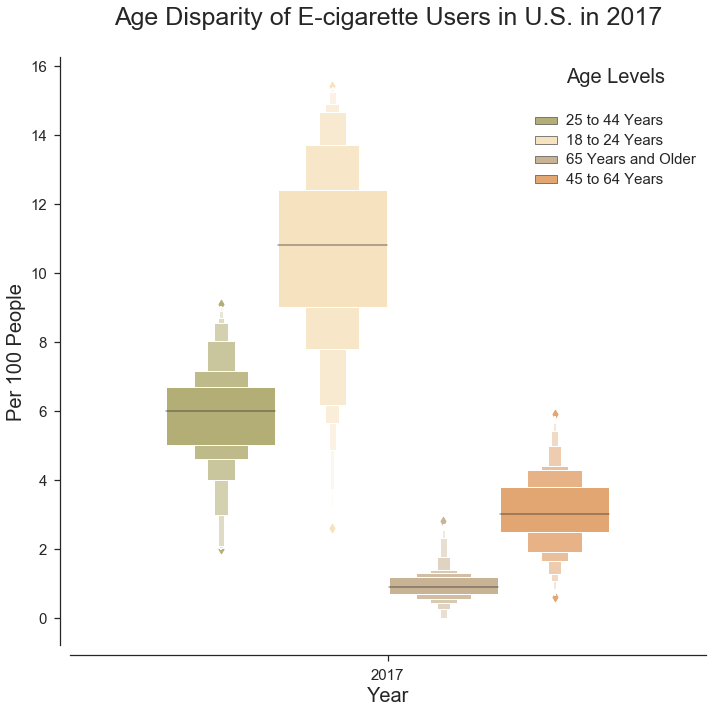

In [93]:
plt.figure(figsize=(10, 10))
fig4 = sns.boxenplot(x="year", y="data_value", width = 0.7,
            hue="age", palette=["darkkhaki", "moccasin", "tan", "sandybrown"],
            data=age_subset)

sns.despine(offset=10)

fig4.set_title(
    "Age Disparity of E-cigarette Users in U.S. in 2017\n", fontsize=25)
fig4.set_xlabel("Year", fontsize=20)
fig4.set_ylabel("Per 100 People", fontsize=20)
fig4.tick_params(labelsize=15)
plt.legend(title='Age Levels\n')
plt.setp(fig4.get_legend().get_texts(), fontsize='15')  # for legend text
plt.setp(fig4.get_legend().get_title(), fontsize='20')  # for legend title
plt.tight_layout()
plt.show()

### EDA Visualization 5

Looking for the states with the highest and lowest percentage of e-cig users in U.S in 2017

In [21]:
# states in 2017 subset, sorted by data _value - taking out guam from the states
states_subset = df.query(' (locationabbr != "GU") & (year == 2017) & (race == "All Races") & ( gender == "Overall") & (topicdesc == "E-Cigarette Use (Adults)") & (measuredesc == "Current Use") & (education == "All Grades") & (age == "All Ages")').sort_values(
    ['data_value'], ascending=False)

In [22]:
# top 5 states with the highest percentages
states_subset[['locationabbr', 'locationdesc','data_value', 'count']].head(10)

,locationabbr,locationdesc,data_value,count
23400,OK,Oklahoma,7.1,452.199
11416,KY,Kentucky,6.1,508.008
9499,IN,Indiana,6.0,788.820
27801,TN,Tennessee,5.8,319.174
32853,WY,Wyoming,5.7,248.805
31595,WV,West Virginia,5.7,306.261
1985,AR,Arkansas,5.7,288.477
18401,NV,Nevada,5.4,197.154
3171,CO,Colorado,5.3,472.018
22827,OH,Ohio,5.3,628.474


In [23]:
# 5 lowest states
states_subset[['locationabbr', 'locationdesc', 'data_value', 'count']].tail()

,locationabbr,locationdesc,data_value,count
3796,CT,Connecticut,3.2,320.800
29737,VT,Vermont,3.0,185.310
2597,CA,California,3.0,259.470
5044,DC,District of Columbia,2.3,87.078
25312,PR,Puerto Rico,1.2,53.460


According to the report of U.S News on Sep 30 2019:

https://www.usnews.com/news/healthiest-communities/slideshows/which-states-vape-use-e-cigarettes-the-most?slide=12

The rankings are still the same:
    
1. Oklahoma
2. Kentucky
3. Indiana
4. Tennessee
5. Wyoming
6. West Virginia
7. Arkansas
8. Nevada
9. (tie) Colorado
9. (tie) Ohio

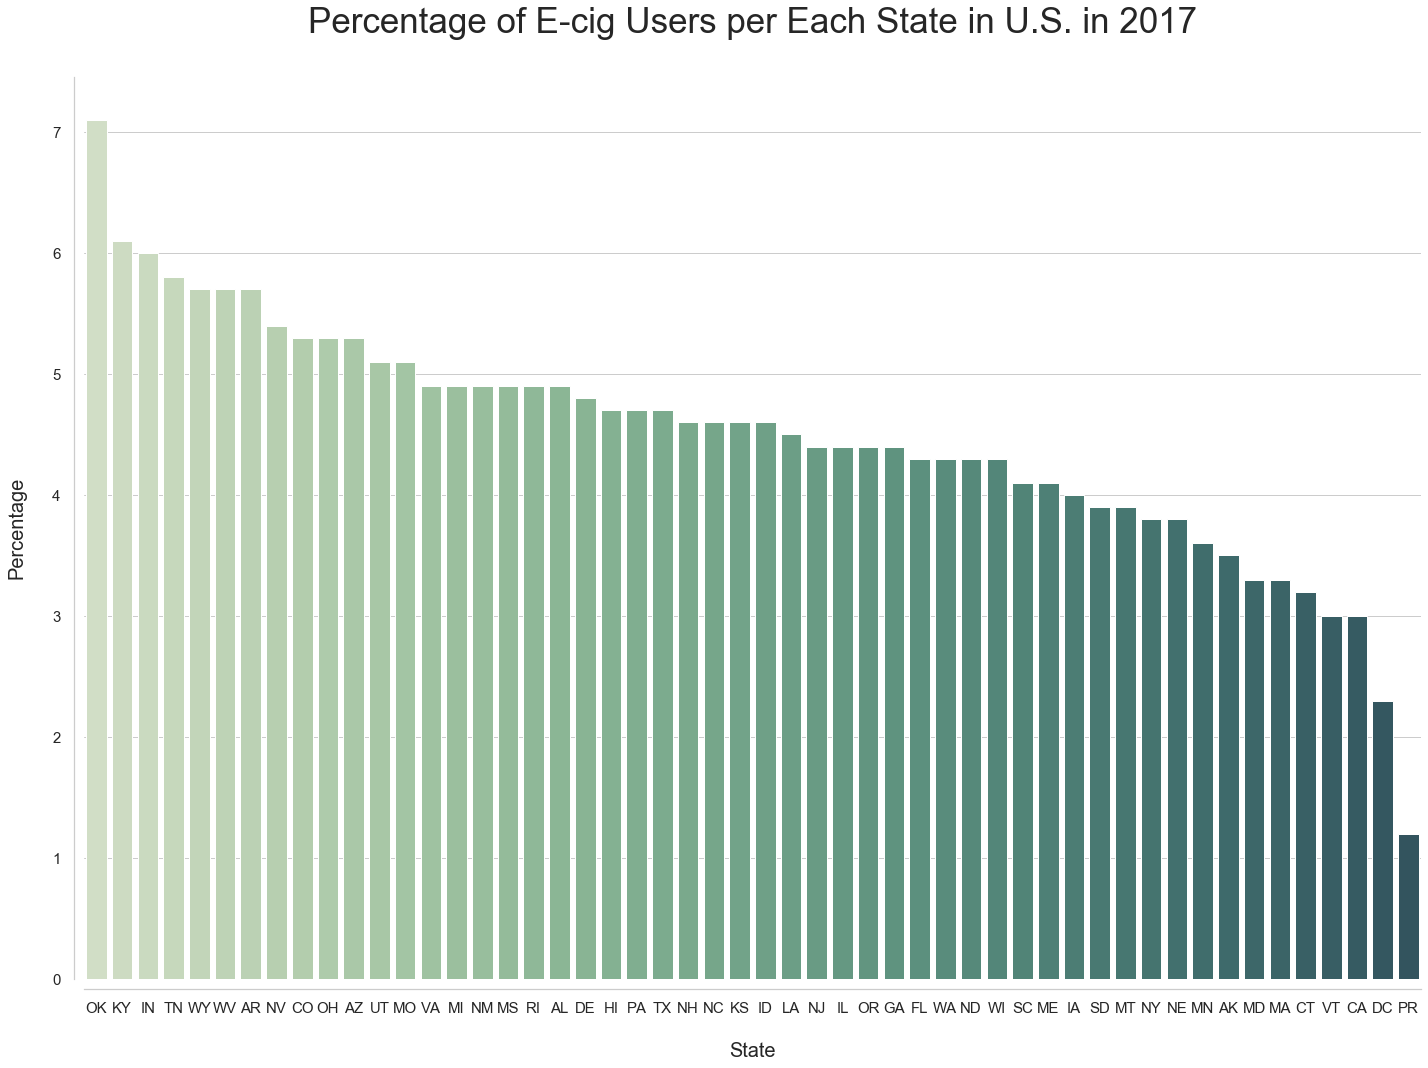

In [24]:
# visualizing all genders for all states in the year 2017
sns.set_style('whitegrid')
plt.figure(figsize=(20, 15))
pal = sns.cubehelix_palette(n_colors = 52, rot=-.5, dark=.3)
fig5 = sns.barplot(data=states_subset,  x="locationabbr",  y="data_value", palette=pal)
sns.despine(offset=10)
fig5.set_title("Percentage of E-cig Users per Each State in U.S. in 2017\n", fontsize=35)
fig5.set_xlabel("\nState", fontsize=20)
fig5.set_ylabel("Percentage\n", fontsize=20)
fig5.tick_params(labelsize=15)
plt.tight_layout()
plt.show()

# II. Hypotheses Tests

### Hypotheses Subsets

Subsets of dataframe are created according to the hypotheses.

In [25]:
#Hypothesis I:

hyp1_subset = df.query('(race == "All Races") & (gender != "Overall") & (year == "2017") &\
(locationabbr == "DC") & (topicdesc == "E-Cigarette Use (Adults)") &\
(education == "All Grades") & (age == "All Ages") & (measuredesc == "Current Use")')


In [26]:
#Hypothesis II:

hyp2_subset = df.query(' (year == "2017") & (locationabbr == "DC") &\
(age != "All Ages") & (topicdesc == "E-Cigarette Use (Adults)") &\
(gender == "Overall") & (education == "All Grades")')

hyp2_subset[['locationabbr', 'age', 'sample_size','data_value', 'count']]

,locationabbr,age,sample_size,data_value,count
5046,DC,25 to 44 Years,1089.0,2.1,22.869
5090,DC,65 Years and Older,1098.0,0.4,4.392
5097,DC,45 to 64 Years,1404.0,2.1,29.484
5103,DC,18 to 24 Years,195.0,5.8,11.310


In [27]:
#Hypothesis III:

hyp3_subset = df.query('(year == "2017") & (locationabbr == "DC") &\
(education != "All Grades") & (education != "12th Grade") &\
(topicdesc == "E-Cigarette Use (Adults)")')
hyp3_subset[['locationabbr', 'age', 'education', 'sample_size','data_value', 'count']]

,locationabbr,age,education,sample_size,data_value,count
5079,DC,Age 25 and Older,> 12th Grade,2559.0,1.6,40.944
5081,DC,Age 25 and Older,< 12th Grade,199.0,0.9,1.791
5112,DC,Age 20 and Older,< 12th Grade,204.0,1.9,3.876
5118,DC,Age 20 and Older,> 12th Grade,2659.0,2.0,53.180


### Tests

Since the values are proportions between two samples, the z-score for proportion comparison is used.

$$
\begin{aligned} Z &=\frac{(\hat{p_{A}}-\hat{p_{B}})-\left(p_{A}-p_{B}\right)}{S E\left(p_{A}-p_{B}\right)} =\frac{(\hat{p_{A}}-\hat{p_{B}})-0}{\sqrt{\hat{p}(1-\hat{p})\left(\frac{1}{n_{A}}+\frac{1}{n_{B}}\right)}} \end{aligned}
$$


#### Hypothesis I Test

Is there a significant difference between the gender and the the proportion of e-cig users in 2017 in DC ?

H0 : Proportion of males and females are equal

H1 : Proportion of males are higher than females

$$
\begin{array}{l}{H_{0}: P_{m}=P_{f}} \\ {H_{1}: P_{m} \neq P_{f}}\end{array}
$$

Analysis:


In [28]:
from name.py import two_proportions_confint
def two_proportions_confint(success_a, size_a, success_b, size_b, significance = 0.05):
  
    prop_a = success_a / size_a
    prop_b = success_b / size_b
    var = prop_a * (1 - prop_a) / size_a + prop_b * (1 - prop_b) / size_b
    se = np.sqrt(var)
    
    # z critical value
    confidence = 1 - significance
    z = stats.norm(loc = 0, scale = 1).ppf(confidence + significance / 2)
    
    # standard formula for the confidence interval
    # point-estimtate +- z * standard-error
    prop_diff = prop_b - prop_a
    confint = prop_diff + np.array([-1, 1]) * z * se
    return prop_diff, confint

In [29]:
def plot_power(min_diff, prob_b, size_a, size_b, significance = 0.05):
    """illustrating power through a two-tailed hypothesis test"""
    
    # obtain the z-score for the minimum detectable
    # difference using proportion_ztest
    prob_a = prob_b + min_diff
    count_a = size_a * prob_a
    count_b = size_b * prob_b
    counts = np.array([count_a, count_b])
    nobs = np.array([size_a, size_b])
    zscore, _ = proportions_ztest(counts, nobs, alternative = 'two-sided')

    # distribution for the null hypothesis, h0
    # and alternative hypothesis, h1
    h0 = stats.norm(loc = 0, scale = 1)
    h1 = stats.norm(loc = zscore, scale = 1)

    # points that are greater than the zscore for the
    # specified significance level
    x = np.linspace(-5, 6, num = 100)
    threshold = h0.ppf(1 - significance/2)
    mask1 = (x > threshold)
    mask2 = (x < -threshold)
    
    # power is the area after the threshold, i.e.
    # 1 - the cumulative distribution function of that point
    power = np.round(1 - h1.cdf(threshold), 2)

    hypotheses = [h1, h0]
    labels = ['$H_1$ is true', '$H_0$ is true']
    for hypothesis, label in zip(hypotheses, labels):
        y = hypothesis.pdf(x)
        line = plt.plot(x, y, label = label)
        plt.fill_between(x = x[mask1], y1 = 0.0, y2 = y[mask1],
                         alpha = 0.2, color = line[0].get_color())
        plt.fill_between(x = x[mask2], y1 = 0.0, y2 = y[mask2],
                         alpha = 0.2, color = line[0].get_color())
    
    title = 'p1: {}, p2: {}, size1: {}, size2: {}, power: {}'
    plt.title(title.format(prob_a, prob_b, size_a, size_b, power), fontdict={'fontsize' : 15})
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()
    plt.show()
    

In [30]:
hyp1_subset[['locationabbr', 'gender', 'sample_size','data_value', 'count']]


,locationabbr,gender,sample_size,data_value,count
5088,DC,Male,1594.0,3.0,47.82
5117,DC,Female,2190.0,1.7,37.23


In [103]:
#hyp_1: z and p values
count_m = 47.82
count_f = 37.23
size_m = 1594
size_f = 2190
p_m = 0.03
p_f = 0.017
min_diff = p_m - p_f

counts_mf = np.array([count_m, count_f])

nobs_mf = np.array([size_m, size_f])

zscore, pvalue = proportions_ztest(counts, nobs, alternative = 'two-sided')
print('zscore = {:.3f}, pvalue = {:.3f}'.format(zscore, pvalue))

zscore = -2.577, pvalue = 0.010


In [32]:
#hyp_1 - diff and conf_int
prop_diff, confint = two_proportions_confint(count_m, size_m, count_f, size_f)
print('estimate difference:', prop_diff)
print('confidence interval:', confint)

estimate difference: -0.013000000000000001
confidence interval: [-0.02297207 -0.00302793]


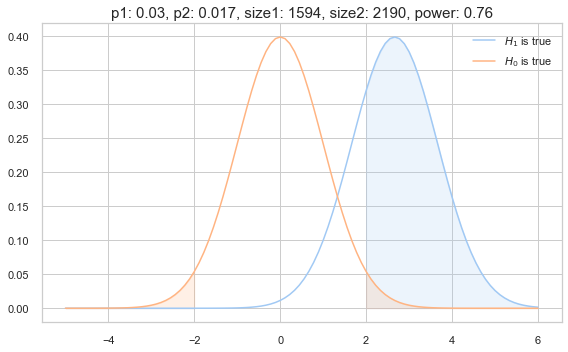

In [105]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,5))
fig = plot_power(min_diff, p_f, size_m, size_f)


#### Hypothesis II Test

Q:  Is there a significant difference between the age groups of 25-44 and 44-65 with the proportion of e-cig users in 2017 in DC ?

H0 : Proportion of the two age groups are equal

H1 : Proportions are different

$$
\begin{array}{l}{H_{0}: P_{y}=P_{o}} \\ {H_{1}: P_{y} \neq P_{o}}\end{array}
$$

Analysis:


In [34]:
#Hyp2 data: young = 25-44, old = 45-64

hyp2_subset[['locationabbr', 'age', 'sample_size','data_value', 'count']]

,locationabbr,age,sample_size,data_value,count
5046,DC,25 to 44 Years,1089.0,2.1,22.869
5090,DC,65 Years and Older,1098.0,0.4,4.392
5097,DC,45 to 64 Years,1404.0,2.1,29.484
5103,DC,18 to 24 Years,195.0,5.8,11.310


In [96]:
#hyp_2: z and p values
count_y = 11.31
count_o = 29.484
size_y = 195
size_o = 1404
p_y = 5.8
p_o = 2.1
min_diff_yo = p_o - p_y

counts_yo = np.array([count_y, count_o])

nobs_yo = np.array([size_y, size_o])

zscore, pvalue = proportions_ztest(counts_yo, nobs_yo, alternative = 'two-sided')
print('zscore = {:.3f}, pvalue = {:.3f}'.format(zscore, pvalue))

zscore = 3.071, pvalue = 0.002


In [97]:
#hyp_2 - diff and conf_int
prop_diff, confint = two_proportions_confint(count_y, size_y, count_o, size_o)
print('estimate difference:', prop_diff)
print('confidence interval:', confint)

estimate difference: -0.037000000000000005
confidence interval: [-0.07065366 -0.00334634]


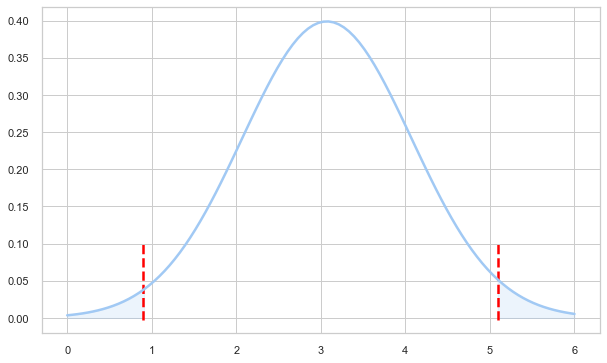

In [115]:
plt.figure(figsize=(10, 6))
zscore = 3.071
significance = 0.05
h = stats.norm(loc = zscore, scale = 1)
x = np.linspace(0, 6, num = 100)
y = h.pdf(x)

mask1 = (x > 5.09)
mask2 = (x < 0.95) 
plt.axvline(x= 5.09, c = "red", linestyle = '--', ymin= 0.04, ymax= 0.28, linewidth= 2.5 )
plt.axvline(x= 0.9, c = "red", linestyle = '--', ymin= 0.04, ymax= 0.28, linewidth= 2.5 )
line = plt.plot(x, y, linewidth= 2.5) 
plt.fill_between(x = x[mask1],  y1 = 0.0, y2 = y[mask1], alpha = 0.2, color = "b")
plt.fill_between(x = x[mask2],  y1 = 0.0, y2 = y[mask2], alpha = 0.2, color = "b")
plt.show()

#### Hypothesis III Test

Q:  Is there a significant difference between proportion of e-cig users and their education level in 2017 in DC ?

H0 : Proportion of the two education levels are equal

H1 : Proportions are different

$$
\begin{array}{l}{H_{0}: P_{h}=P_{L}} \\ {H_{1}: P_{h} \neq P_{L}}\end{array}
$$

Analysis:

In [98]:
#hyp_3: z and p values
count_h = 40.944
count_l = 26.130
size_h = 2559
size_l = 871
p_h = 1.6
p_l = 3

counts_hl = np.array([count_h, count_l])

nobs_hl = np.array([size_h, size_l])

zscore, pvalue = proportions_ztest(counts_hl, nobs_hl, alternative = 'two-sided')
print('zscore = {:.3f}, pvalue = {:.3f}'.format(zscore, pvalue))

zscore = -2.577, pvalue = 0.010


In [99]:
#Hypothesis III:

hyp3_subset[['locationabbr', 'age', 'education', 'sample_size','data_value', 'count']]

,locationabbr,age,education,sample_size,data_value,count
5079,DC,Age 25 and Older,> 12th Grade,2559.0,1.6,40.944
5081,DC,Age 25 and Older,< 12th Grade,199.0,0.9,1.791
5112,DC,Age 20 and Older,< 12th Grade,204.0,1.9,3.876
5118,DC,Age 20 and Older,> 12th Grade,2659.0,2.0,53.180


In [100]:
#hyp_3: z and p values
count_h = 40.944
count_l = 26.130
size_h = 2559
size_l = 871
p_h = 1.6
p_l = 3
min_diff_hl = p_l - p_h

counts = np.array([count_h, count_l])

nobs = np.array([size_h, size_l])

zscore, pvalue = proportions_ztest(counts, nobs, alternative = 'two-sided')
print('zscore = {:.3f}, pvalue = {:.3f}'.format(zscore, pvalue))

zscore = -2.577, pvalue = 0.010


In [101]:
#hyp_3 - diff and conf_int
prop_diff, confint = two_proportions_confint(count_h, size_h, count_l, size_l)
print('estimate difference:', prop_diff)
print('confidence interval:', confint)

estimate difference: 0.013999999999999999
confidence interval: [0.00167211 0.02632789]
